In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [2]:
df = pd.read_csv(r'..\data\the-movies-dataset\ratings_small.csv')
df2 = pd.read_csv(r'..\data\the-movies-dataset\ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [25]:
# ratings_small
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [26]:
df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [27]:
df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [3]:
convert = lambda e: datetime.utcfromtimestamp(e).strftime('%Y-%m-%d') # %H:%M:%S ommited

In [29]:
df.timestamp = df.timestamp.apply(convert)

In [30]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14
1,1,1029,3.0,2009-12-14
2,1,1061,3.0,2009-12-14
3,1,1129,2.0,2009-12-14
4,1,1172,4.0,2009-12-14


In [13]:
df.columns = ['user_Id', 'movie_Id', 'rating', 'date']
df.head()

,user_Id,movie_Id,rating,date
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
df = df.set_index('date')
df.head(1)

,user_Id,movie_Id,rating
date,,,
1260759144,1,31,2.5


In [15]:
df.describe()

,user_Id,movie_Id,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


##DF2 Ratings##

In [4]:
df2.columns = ['user_Id', 'movie_Id', 'rating', 'date']
df2.head()

,user_Id,movie_Id,rating,date
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
df2.date = df2.date.apply(convert)

In [9]:
df2= df2.set_index('date')

In [16]:
df2.describe()

,user_Id,movie_Id,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


In [10]:
df2.head(1)

,user_Id,movie_Id,rating
date,,,
2015-03-09,1,110,1.0


##REPRESENTACIONES GRAFICAS##

In [27]:
# Average movie rating
vc = df.rating.value_counts()
vc

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

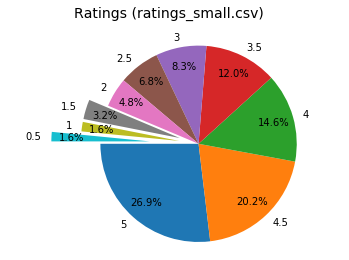

In [100]:
# Labels
labels = '5', '4.5', '4', '3.5', '3', '2.5', '2', '1.5', '1', '0.5'
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.5)  

# Plot
plt.pie(vc, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 180, pctdistance = 0.8, labeldistance = 1.1)

plt.suptitle('Ratings (ratings_small.csv)', fontsize = 14)
plt.axis('equal')
plt.show()

In [95]:
vc = vc = df2.rating.value_counts()
vc

4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64

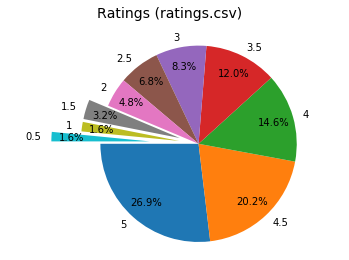

In [99]:
# Labels
labels = '5', '4.5', '4', '3.5', '3', '2.5', '2', '1.5', '1', '0.5'
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.5)  

# Plot
plt.pie(vc, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 180, pctdistance = 0.8, labeldistance = 1.1)

plt.suptitle('Ratings (ratings.csv)', fontsize = 14)
plt.axis('equal')
plt.show()